In [89]:
# -------------------------
# Step 1: Import Required Libraries
# -------------------------
# Load libraries for data handling, statistical analysis, visualization, and clustering
import pandas as pd                     # Efficient tabular data manipulation
import numpy as np                      # Numerical computing
from scipy.stats import linregress     # Linear regression analysis
import seaborn as sns                   # Enhanced statistical plotting
import matplotlib.pyplot as plt         # Core plotting functionality
import plotly.express as px             # Interactive plots
import plotly.graph_objects as go       # Advanced Plotly visualizations
from sklearn.preprocessing import StandardScaler  # Feature scaling for clustering
from scipy.cluster.hierarchy import linkage, dendrogram  # Hierarchical clustering and dendrograms


# -------------------------
# Step 2: Prepare NGX Sector Weekly Performance Data
# -------------------------
# Define weekly percentage performance for NGX sectors over 4 weeks in a dictionary
data = {
    "NGX - BANKING SERVICES": [14.06, 15.60, 14.83, 12.78],
    "NGX - FINANCIAL SERVICES": [42.30, 41.54, 42.54, 45.73],
    "NGX - BREWERIES": [49.45, 60.02, 60.60, 63.68],
    "NGX - TELECOMMUNICATION": [19.70, 36.41, 37.41, 52.09],
    "NGX - INSURANCE": [18.31, 19.84, 20.84, 26.69],
    "NGX - PACKAGED FOODS": [35.10, 36.52, 35.14, 33.59],
    "NGX - INDUSTRIALS": [49.48, 51.21, 52.93, 56.34],
    "NGX - CONSTRUCTION": [12.59, 13.74, 14.74, 14.70],
    "NGX - TECHNOLOGY SERVICES": [-5.13, -7.69, -6.69, -7.41],
    "NGX - OIL & GAS SERVICES": [26.96, 29.14, 27.14, 26.90],
    "NGX - TRANSPORTATION, AVIATION AND LOGISTICS": [75.34, 73.27, 76.27, 78.34],
    "NGX - PHARMACEUTICALS": [11.68, 25.71, 32.71, 42.78],
    "NGX - HOSPITALITY": [111.68, 102.92, 109.92, 126.28],
    "NGX - AGRICULTURAL SERVICES": [31.99, 30.05, 33.05, 46.52],
    "NGX - CONGLOMERATES": [42.42, 45.24, 47.24, 51.79],
    "NGX - REIT/REAL ESTATE": [4.71, 1.35, 1.35, 1.01]
}

# Convert dictionary into a DataFrame with sectors as rows and weeks as columns
df = pd.DataFrame.from_dict(data, orient='index', columns=["Week 1", "Week 2", "Week 3", "Week 4"])

# Label index to identify sectors clearly in analysis and visualization
df.index.name = "Sector"


In [91]:
# Display the prepared DataFrame containing weekly performance data for each NGX sector
df

,Week 1,Week 2,Week 3,Week 4
Sector,,,,
NGX - BANKING SERVICES,14.06,15.60,14.83,12.78
NGX - FINANCIAL SERVICES,42.30,41.54,42.54,45.73
NGX - BREWERIES,49.45,60.02,60.60,63.68
NGX - TELECOMMUNICATION,19.70,36.41,37.41,52.09
NGX - INSURANCE,18.31,19.84,20.84,26.69
NGX - PACKAGED FOODS,35.10,36.52,35.14,33.59
NGX - INDUSTRIALS,49.48,51.21,52.93,56.34
NGX - CONSTRUCTION,12.59,13.74,14.74,14.70
NGX - TECHNOLOGY SERVICES,-5.13,-7.69,-6.69,-7.41


In [93]:
# -------------------------
# Step 3: Compute Linear Trend Slope and Categorize Performance Trends
# -------------------------

# Function to calculate the slope of the linear regression line over weekly data,
# quantifying the direction and magnitude of each sector’s performance trend
def determine_trend(values):
    x = np.arange(len(values))              # Week indices: [0, 1, 2, 3]
    slope, _, _, _, _ = linregress(x, values)
    return slope

# Calculate trend slopes for each sector and assign corresponding trend labels
df["Trend Slope"] = df.apply(determine_trend, axis=1)
df["Trend"] = df["Trend Slope"].apply(lambda x: "Uptrend" if x > 0 else ("Downtrend" if x < 0 else "Flat"))


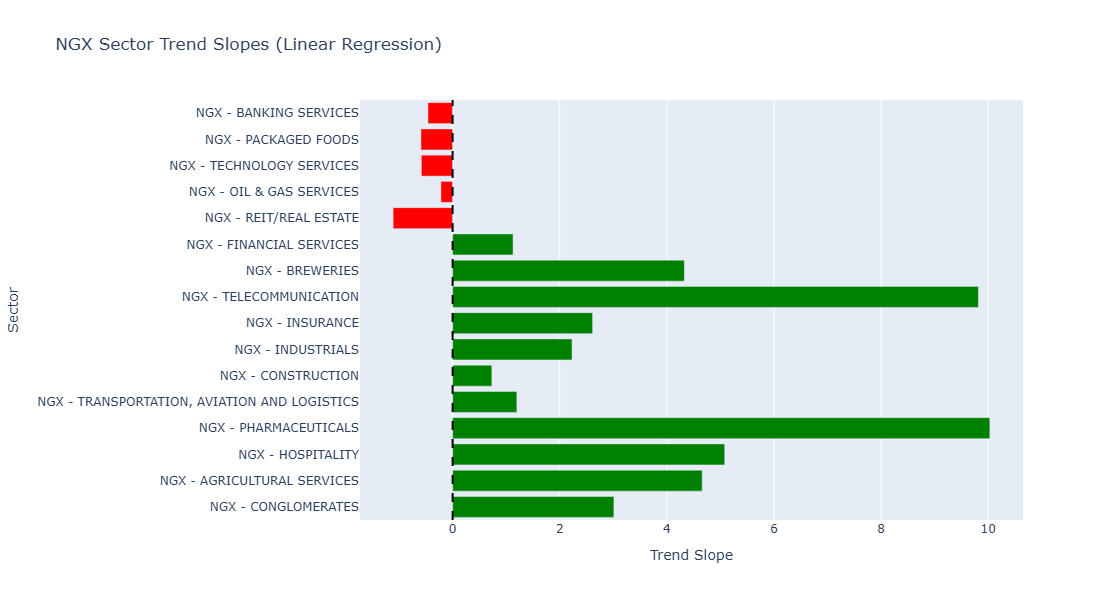

In [95]:
# -------------------------
# Step 4: Map Colors, Rank Trend Strength, and Plot Interactive Bar Chart
# -------------------------

# Map trend categories to colors for visualization
df["Color"] = df["Trend"].map({
    "Uptrend": "green",
    "Downtrend": "red",
    "Flat": "gray"
})

# Rank sectors by absolute trend slope to indicate trend strength (higher = stronger)
df["Trend Strength Rank"] = df["Trend Slope"].rank(ascending=False)

# Create horizontal interactive bar plot of trend slopes by sector
fig = px.bar(
    df.reset_index(),
    x="Trend Slope",
    y="Sector",
    color="Color",
    color_discrete_map={"green": "green", "red": "red", "gray": "gray"},
    orientation="h",
    title="NGX Sector Trend Slopes (Linear Regression)",
    labels={"Trend Slope": "Trend Slope", "Sector": "Sector"},
    hover_data=["Trend", "Trend Strength Rank"]
)

# Add vertical reference line at zero to separate uptrends from downtrends
fig.add_vline(x=0, line_dash="dash", line_color="black")

# Adjust layout for better readability and reverse y-axis to match sorted order
fig.update_layout(
    yaxis=dict(title="Sector", autorange="reversed"),
    xaxis=dict(title="Trend Slope"),
    showlegend=False,
    height=600
)

# Render the plot
fig.show()


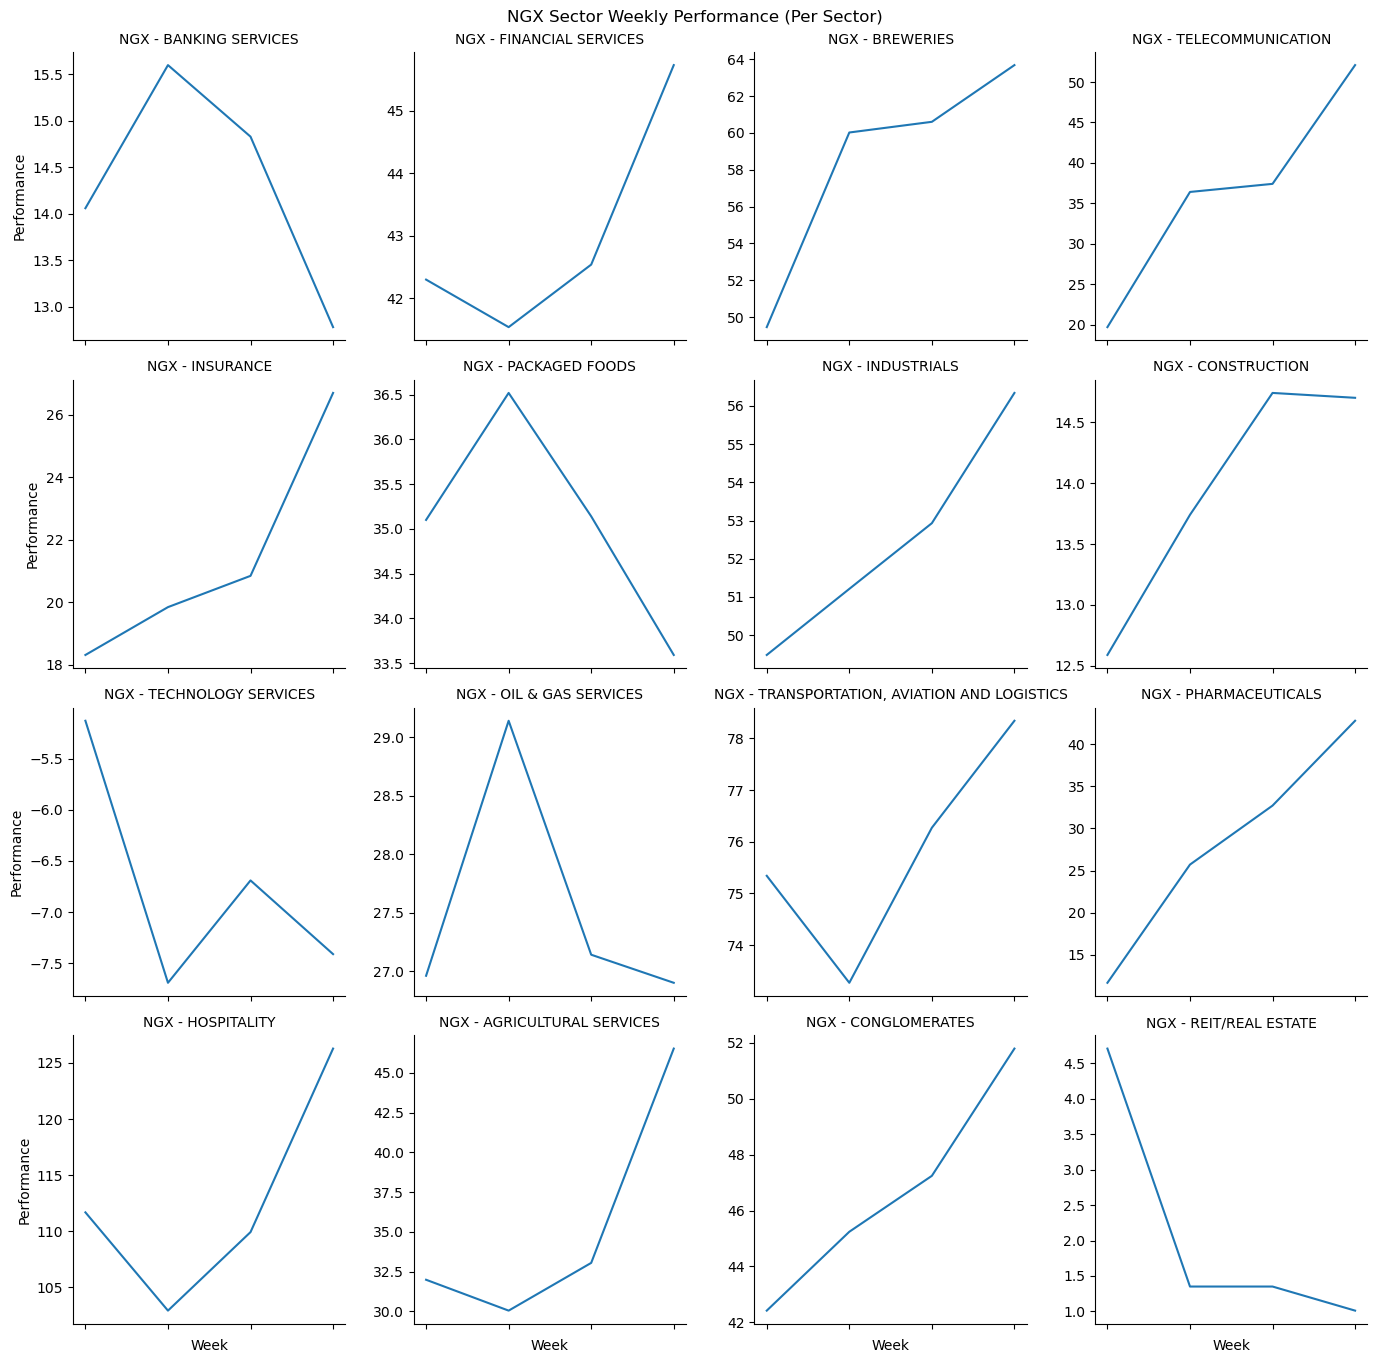

In [97]:
# -------------------------
# Step 5: Reshape Data and Create Faceted Line Plots per Sector
# -------------------------

# Transform DataFrame from wide to long format for easier plotting with seaborn
df_plot = df.reset_index().melt(
    id_vars=["Sector"], 
    value_vars=["Week 1", "Week 2", "Week 3", "Week 4"],
    var_name="Week", 
    value_name="Performance"
)

# Create faceted line plots (small multiples) showing weekly performance trends per sector
g = sns.FacetGrid(df_plot, col="Sector", col_wrap=4, height=3.5, sharey=False)
g.map_dataframe(sns.lineplot, x="Week", y="Performance")

# Customize facet titles and x-axis labels for readability
g.set_titles(col_template="{col_name}", size=10)
g.set_xticklabels(rotation=45)

# Adjust layout and add overall plot title
plt.subplots_adjust(top=0.95)
g.fig.suptitle("NGX Sector Weekly Performance (Per Sector)")

# Display the plot
plt.show()


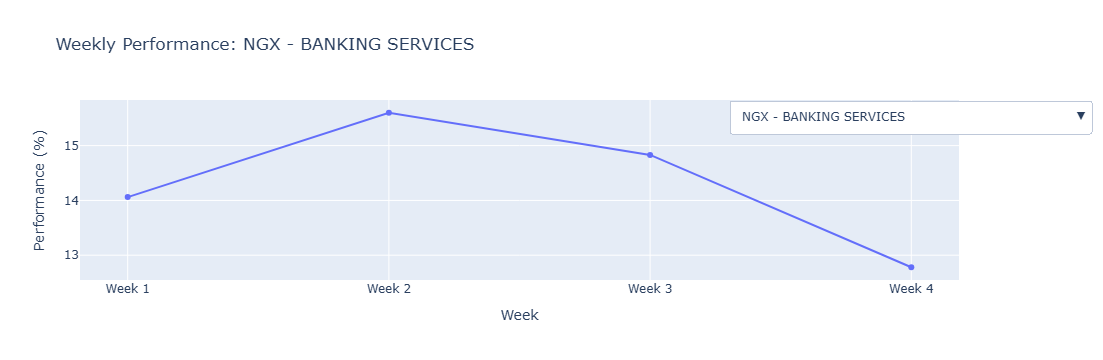

In [99]:
# -------------------------
# Step 6: Create a dropdown menu for each sector
# -------------------------
fig = go.Figure()

# Add traces for each sector but only show the first initially
for i, sector in enumerate(df.index):
    visible = [False] * len(df.index)
    visible[i] = True
    fig.add_trace(go.Scatter(x=["Week 1", "Week 2", "Week 3", "Week 4"],
                             y=df.loc[sector, "Week 1":"Week 4"],
                             name=sector, visible=(i == 0)))

# Create buttons for dropdown menu
buttons = [
    dict(label=sector,
         method="update",
         args=[{"visible": [i == j for j in range(len(df.index))]},
               {"title": f"Weekly Performance: {sector}"}])
    for i, sector in enumerate(df.index)
]

# Add layout
fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons, x=1.15)],
    title="Weekly Performance: NGX - BANKING SERVICES",
    xaxis_title="Week",
    yaxis_title="Performance (%)"
)

fig.show()


In [101]:
# -------------------------
# Step 7: Output Final DataFrame
# -------------------------
# Display with styled colors
def highlight_trend(val):
    return 'color: green;' if val == 'Uptrend' else 'color: red;'

styled_df = (
    df[["Trend", "Trend Slope", "Trend Strength Rank"]]
    .sort_values("Trend Strength Rank")
    .style
    .map(highlight_trend, subset=["Trend"])
    .format({"Trend Slope": "{:.4f}", "Trend Strength Rank": "{:.0f}"})
)

styled_df


,Trend,Trend Slope,Trend Strength Rank
Sector,,,
NGX - PHARMACEUTICALS,Uptrend,10.0300,1
NGX - TELECOMMUNICATION,Uptrend,9.8170,2
NGX - HOSPITALITY,Uptrend,5.0800,3
NGX - AGRICULTURAL SERVICES,Uptrend,4.6590,4
NGX - BREWERIES,Uptrend,4.3270,5
NGX - CONGLOMERATES,Uptrend,3.0110,6
NGX - INSURANCE,Uptrend,2.6140,7
NGX - INDUSTRIALS,Uptrend,2.2300,8
"NGX - TRANSPORTATION, AVIATION AND LOGISTICS",Uptrend,1.2000,9


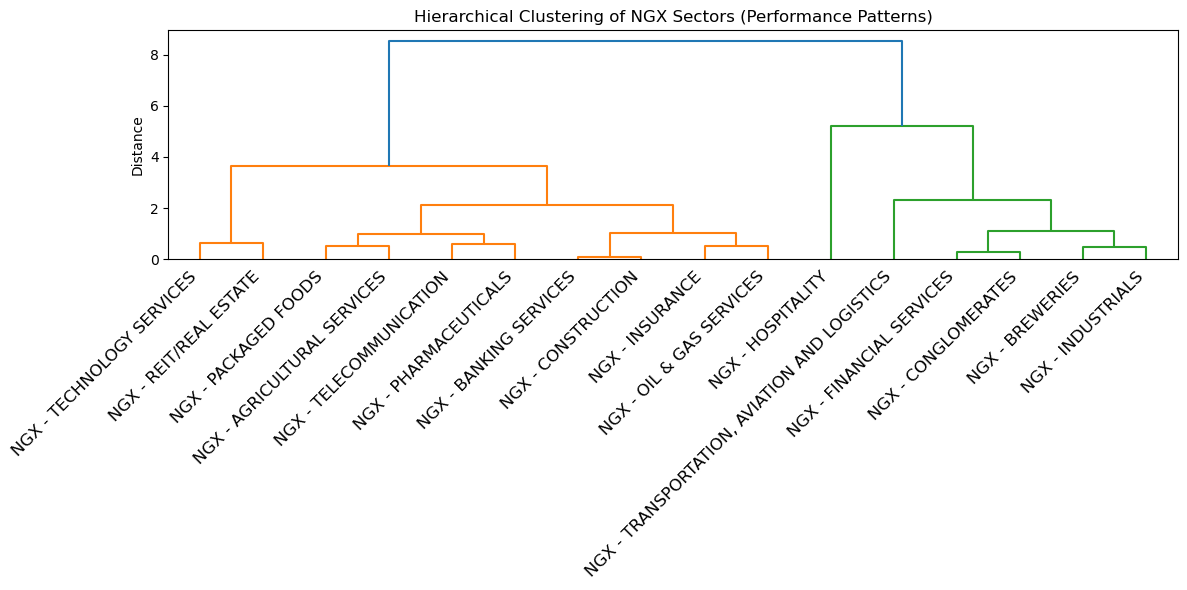

In [109]:
# -------------------------
# Step 8: Clustering sectors based on normalized performance patterns
# -------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["Week 1", "Week 2", "Week 3", "Week 4"]])
linkage_matrix = linkage(scaled_data, method='ward')

# Dendrogram plot
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    labels=df.index.tolist(),
    leaf_rotation=90,
    color_threshold=0.7 * max(linkage_matrix[:, 2])  # Optional: adds color to clusters
)
plt.title("Hierarchical Clustering of NGX Sectors (Performance Patterns)")
plt.ylabel("Distance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can note that when we focus on the "MACD Signal" column, 

- "Buy" indicates bullish momentum — the sector may be entering an uptrend.
- "Sell" indicates bearish momentum — potential weakness or reversal.

✅ Strong Buy Signals
These are sectors with both high MACD and a “Buy” signal suggest strong upward momentum. The sector identified here includes:- 
- NGX - TELECOMMUNICATION: MACD 4.05 > Signal 3.46 → Strong Buy
- NGX - PHARMACEUTICALS: Also strong — may be in sustained growth phase

⚠️ Weak or Conflicting Buy Signals
These are sectors where the MACD has crossed above the signal line. We can also stated that it is in a bearish zone. The sector identified here includes:- 
- NGX - TECHNOLOGY SERVICES: MACD is negative (-0.206) but still marked “Buy”
- Indicates the MACD has crossed above its signal line, but still in bearish zone
- NGX - REIT/REAL ESTATE: Same — very mild signal; proceed with caution.

🚫 Sell Signals
These are sectors where the MACD < Signal Line → bearish crossover = downward pressure
NGX - BANKING SERVICES, PACKAGED FOODS, OIL & GAS SERVICES
 -------------------------

In [105]:
# -------------------------
# Step 9: Calculate MACD (Moving Average Convergence Divergence) and signal line for each sector
# -------------------------
def compute_macd(values, fast=2, slow=3, signal=2):
    fast_ema = pd.Series(values).ewm(span=fast, adjust=False).mean()
    slow_ema = pd.Series(values).ewm(span=slow, adjust=False).mean()
    macd = fast_ema - slow_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd.iloc[-1], signal_line.iloc[-1]

# Apply MACD computation to each sector
macd_results = []
for sector in df.index:
    values = df.loc[sector].values[:4]  # Week 1 to Week 4
    macd, signal_line = compute_macd(values)
    macd_results.append((macd, signal_line))

# Append to DataFrame
df_macd = df.copy()
df_macd["MACD"] = [m[0] for m in macd_results]
df_macd["Signal Line"] = [m[1] for m in macd_results]
df_macd["MACD Signal"] = np.where(df_macd["MACD"] > df_macd["Signal Line"], "Buy", "Sell")

# Show MACD signal summary
df_macd[["MACD", "Signal Line", "MACD Signal"]].sort_values("MACD", ascending=False)


,MACD,Signal Line,MACD Signal
Sector,,,
NGX - TELECOMMUNICATION,4.055417,3.462685,Buy
NGX - PHARMACEUTICALS,3.884676,3.455278,Buy
NGX - HOSPITALITY,2.928333,1.832963,Buy
NGX - AGRICULTURAL SERVICES,2.491019,1.687963,Buy
NGX - BREWERIES,1.523657,1.493981,Buy
NGX - CONGLOMERATES,1.284167,1.052037,Buy
NGX - INSURANCE,1.248472,0.935463,Buy
NGX - INDUSTRIALS,0.959398,0.778056,Buy
NGX - FINANCIAL SERVICES,0.603704,0.406667,Buy


CONCLUSION
-------------------------
The MACD analysis reveals a broadly bullish sentiment across most NGX sectors, with strong momentum concentrated in:

- NGX - Telecommunication
- NGX - Pharmaceuticals
- NGX - Hospitality
- NGX - Agricultural Services

These sectors exhibit the highest positive MACD crossovers, suggesting sustained upward momentum and investor interest — positioning them as potential leaders in short-term performance.

Meanwhile, a few sectors like NGX - Banking Services, Packaged Foods, and Oil & Gas Services are showing clear bearish signals, indicating a potential loss of momentum or short-term weakness. These may warrant caution or reevaluation in a portfolio context.

Sectors such as Technology Services and REIT/Real Estate are in transitional phases, with weak but improving signals — they may offer early entry points, though with higher uncertainty.